# **Section-1: Introduction**

* In today's world, where the global community continues to combat the COVID-19 pandemic, the development of accurate and efficient tools for disease prediction has become increasingly crucial.
* In line with this need, our proposal aims to build a machine learning model to predict whether an individual is COVID-19 positive or not based on a dataset of symptoms.

# **Importance in Today's World:**
* The COVID-19 pandemic has overwhelmed healthcare systems worldwide, leading to a pressing need for efficient and reliable diagnostic methods.
* Traditional diagnostic approaches, such as PCR testing, often require time-consuming laboratory procedures and are limited by testing capacity.
* By developing a machine learning model for COVID-19 prediction, we offer a promising solution that can provide quick and accurate assessments based on symptoms alone, without the need for extensive laboratory testing.
* This can greatly improve the early identification of COVID-19 cases, enabling prompt medical intervention and appropriate allocation of healthcare resources.

# **Improving Medical Treatment:**
* Accurate disease prediction plays a vital role in improving medical treatment outcomes.
* By accurately identifying individuals who are likely to be COVID-19 positive, our machine learning model can enable early intervention, leading to timely medical care and the implementation of necessary preventive measures.

# **Impact on the Medical Field:**
* The implementation of an effective screening tool based on our machine learning model can have a profound impact on the medical field.
* It can significantly reduce the burden on healthcare systems by streamlining the diagnostic process, particularly in areas with limited testing capacities. .

# **Future Applications and Knowledge Gap:**
* Beyond its immediate application in COVID-19 prediction, our proposed machine learning model can serve as a valuable framework for predicting other diseases based on symptoms.
* The knowledge gained from developing this model, such as feature selection techniques and algorithmic approaches, can be applied to future disease prediction efforts.
* This has the potential to fill knowledge gaps in various healthcare domains, allowing for faster and more accurate diagnosis of diseases beyond COVID-19.

# **Section-2: Initial Hypothesis**
Based on the dataset provided, we can form the following initial hypotheses:

**Hypothesis 1:** Patients who were in direct contact with confirmed COVID-19 positive patients are more likely to test positive for the virus.

This hypothesis suggests that individuals who have had close contact with confirmed COVID-19 positive patients are at a higher risk of being infected themselves. By examining the variable "Known_contact" in the dataset, we can investigate whether there is a correlation between known contact with COVID-19 positive patients and the likelihood of testing positive for the virus.

**Hypothesis 2:** Symptoms such as shortness of breath, fever, and cough are important factors in predicting COVID-19 positive cases.

This hypothesis proposes that symptoms such as shortness of breath, fever, and cough are key indicators in identifying COVID-19 positive cases. By analyzing the variables "Shortness_of_breath," "Fever," and "Cough_symptoms" in the dataset, we can explore the relationship between these symptoms and the likelihood of a person being COVID-19 positive or negative.

It is important to note that these are initial hypotheses based on the provided dataset, and further analysis and modeling will be required to validate these assumptions and uncover additional insights related to COVID-19 prediction.

**Hypothesis 3:**
There are also certain columns which are not directly relevant for the prediction of Covid-19 such as 'Ind_id' and 'Test_Date'.We can ignore this for our futher analysis.

# **Importing Important Libraries**

In [1]:
#for data exploration
import pandas as pd
import numpy as np
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **3.Loading dataset to colab**

In [2]:
#importing our dataset from local drive to colab
from google.colab import files
uploaded=files.upload()

Saving capstone_project_covid-19.xlsx to capstone_project_covid-19.xlsx


In [3]:
#naming our dataset as 'df'
df=pd.read_excel('capstone_project_covid-19.xlsx')

In [4]:
#calling our dataset
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-03-11,True,False,True,False,False,negative,None,None,Abroad
1,2,2020-03-11,False,True,False,False,False,positive,None,None,Abroad
2,3,2020-03-11,False,True,False,False,False,positive,None,None,Abroad
3,4,2020-03-11,True,False,False,False,False,negative,None,None,Abroad
4,5,2020-03-11,True,False,False,False,False,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,2020-04-30,False,False,False,False,False,positive,None,male,Other
278844,278845,2020-04-30,False,False,False,False,False,negative,None,female,Other
278845,278846,2020-04-30,False,False,False,False,False,negative,None,male,Other
278846,278847,2020-04-30,False,False,False,False,False,negative,None,male,Other


In [5]:
#checking the shape i.e. number of rows and columns
df.shape

(278848, 11)

In [6]:
#checking the data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278848 non-null  int64         
 1   Test_date            278848 non-null  datetime64[ns]
 2   Cough_symptoms       278848 non-null  object        
 3   Fever                278848 non-null  object        
 4   Sore_throat          278848 non-null  object        
 5   Shortness_of_breath  278848 non-null  object        
 6   Headache             278848 non-null  object        
 7   Corona               278848 non-null  object        
 8   Age_60_above         278848 non-null  object        
 9   Sex                  278848 non-null  object        
 10  Known_contact        278848 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 23.4+ MB


In [7]:
#checking for null values
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [8]:
#checking for the unique values in all the columns
for i in df:
  print(i, ":", df[i].unique())

Ind_ID : [     1      2      3 ... 278846 278847 278848]
Test_date : ['2020-03-11T00:00:00.000000000' '2020-03-12T00:00:00.000000000'
 '2020-03-13T00:00:00.000000000' '2020-03-14T00:00:00.000000000'
 '2020-03-15T00:00:00.000000000' '2020-03-16T00:00:00.000000000'
 '2020-03-17T00:00:00.000000000' '2020-03-18T00:00:00.000000000'
 '2020-03-19T00:00:00.000000000' '2020-03-20T00:00:00.000000000'
 '2020-03-21T00:00:00.000000000' '2020-03-22T00:00:00.000000000'
 '2020-03-23T00:00:00.000000000' '2020-03-24T00:00:00.000000000'
 '2020-03-25T00:00:00.000000000' '2020-03-26T00:00:00.000000000'
 '2020-03-27T00:00:00.000000000' '2020-03-28T00:00:00.000000000'
 '2020-03-29T00:00:00.000000000' '2020-03-30T00:00:00.000000000'
 '2020-03-31T00:00:00.000000000' '2020-04-01T00:00:00.000000000'
 '2020-04-02T00:00:00.000000000' '2020-04-03T00:00:00.000000000'
 '2020-04-04T00:00:00.000000000' '2020-04-05T00:00:00.000000000'
 '2020-04-06T00:00:00.000000000' '2020-04-07T00:00:00.000000000'
 '2020-04-08T00:00:00

# **Insights**
1. From the above data that I loaded, I see that there are total of 2,78,848 **rows/observartions** and 11 **columns/features**.
2. Majority of the columns are of **categorical features(nominal variable)** except 'Ind_Id' and 'Test_date'.
3. I also noticed that there are boolean values i.e. True and False.

# **4. Data Cleaning**

In [9]:
#removing unwanted columns as these columns are not required for Covid-19 prediction.
df.drop(columns=['Ind_ID'],inplace=True)

In [10]:
df

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,True,False,True,False,False,negative,None,None,Abroad
1,2020-03-11,False,True,False,False,False,positive,None,None,Abroad
2,2020-03-11,False,True,False,False,False,positive,None,None,Abroad
3,2020-03-11,True,False,False,False,False,negative,None,None,Abroad
4,2020-03-11,True,False,False,False,False,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,False,False,False,False,False,positive,None,male,Other
278844,2020-04-30,False,False,False,False,False,negative,None,female,Other
278845,2020-04-30,False,False,False,False,False,negative,None,male,Other
278846,2020-04-30,False,False,False,False,False,negative,None,male,Other


In [11]:
#checking for the values of individual columns.
for i in df:
  print(i,  ":" , df[i].value_counts())

Test_date : 2020-04-20    10921
2020-04-19    10199
2020-04-22     9646
2020-04-21     9624
2020-04-16     9138
2020-04-23     8744
2020-04-01     8654
2020-04-13     8425
2020-04-02     8188
2020-04-03     8079
2020-04-17     7645
2020-04-05     7509
2020-04-30     7313
2020-04-27     7304
2020-04-15     7149
2020-03-31     7134
2020-04-24     7028
2020-03-26     6663
2020-04-14     6571
2020-04-28     6334
2020-04-18     6321
2020-04-26     6131
2020-04-12     5984
2020-03-27     5963
2020-04-07     5931
2020-03-30     5915
2020-04-10     5678
2020-03-28     5602
2020-03-25     5495
2020-04-06     5368
2020-03-29     5277
2020-04-04     5145
2020-04-25     5052
2020-03-24     4735
2020-04-09     4539
2020-04-11     4341
2020-04-29     4259
2020-04-08     4058
2020-03-22     3565
2020-03-23     3494
2020-03-19     2243
2020-03-18     1991
2020-03-20     1870
2020-03-21     1648
2020-03-17     1463
2020-03-16     1304
2020-03-15      985
2020-03-13      686
2020-03-12      634
2020-03-

# **Insights:**
1. Columns like **'Cough_symptoms'**, **'Fever'**, **'Sore_throat'**, **'Shortness_of_breath'**, **'Headache'**, have weightage of null values **less than 1%** of the total value, so **dropping** them will be the best option instead of **imputing them** with some values as **imputing them can make our data bias.**
2. Columns like  **'Age_60_above'** and  **'Sex'** have a **higher null values** so **imputing them** will be the best option.
3. Columns like **'Corona'** and **'known_contact'** have other values which means there valuea are not correctly known.

# **Dropping "None" values With Less Weightage In Respective Columns.**

# **1.1. Cough_symptoms**

In [12]:
#dropping rows with none values as it will not impact the data much
df=df[df.Cough_symptoms!='None']

In [13]:
#checking the values
df.Cough_symptoms.value_counts()

False    236368
True      42228
Name: Cough_symptoms, dtype: int64

# **1.2. Fever**

In [14]:
df=df[df.Fever!='None']

In [15]:
df.Fever.value_counts()

False    256843
True      21751
Name: Fever, dtype: int64

# **1.3. Sore_throat**

In [16]:
df=df[df.Sore_throat!='None']

In [17]:
df.Sore_throat.value_counts()

False    276672
True       1922
Name: Sore_throat, dtype: int64

# **1.4. Shortness_of_breath**

In [18]:
df=df[df.Shortness_of_breath!='None']

In [19]:

df.Shortness_of_breath.value_counts()

False    277020
True       1574
Name: Shortness_of_breath, dtype: int64

# **1.5. Headache**

In [20]:
df=df[df.Headache!='None']

In [21]:
df.Headache.value_counts()

False    276186
True       2408
Name: Headache, dtype: int64

# **Dealing with columns having higher null values**

* **Age_60_above**: have higher null values and the reason can be the patient didn't want to disclose their age.
* So it's better to rename them as '**Unkown**'.

In [22]:
df['Age_60_above']=df['Age_60_above'].apply(lambda x:'Unknown' if x=='None' else x)

In [23]:
df['Age_60_above'].value_counts()

Unknown    127315
No         125504
Yes         25775
Name: Age_60_above, dtype: int64

* **Sex** columns too have higher null values and the reason can be same as Age.
* So changing it to **"Unkown"** as well.

In [24]:
df['Sex']=df['Sex'].apply(lambda x:'Unknown' if x=='None' else x)

In [25]:
df['Sex'].value_counts()

female     130030
male       129012
Unknown     19552
Name: Sex, dtype: int64

# **Dealing with 'Other' values in respective columns.**

1. **Corona**
   * The value of **other** in Corona column counts to 3,892 which is less than 2% of the total value.
   * It will not impact our model's prediction much if we drop it. So **dropping it** will be a better option.

In [26]:
df=df[df.Corona!='other']

In [27]:
df.Corona.value_counts()

negative    260008
positive     14694
Name: Corona, dtype: int64

2. **Known_contact:**
          * The value of *'other'* in Known_contact is 2,42,741 so dropping them will not be a good decision.
          * I will rename it as *'Unkown'*

In [28]:
df['Known_contact']=df['Known_contact'].apply(lambda x:'Unknown' if x=='Other' else x)

In [29]:
df['Known_contact'].value_counts()

Unknown                   239167
Abroad                     25068
Contact with confirmed     10467
Name: Known_contact, dtype: int64

# **After cleaning the data we have:**

In [30]:
df

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,True,False,True,False,False,negative,Unknown,Unknown,Abroad
1,2020-03-11,False,True,False,False,False,positive,Unknown,Unknown,Abroad
2,2020-03-11,False,True,False,False,False,positive,Unknown,Unknown,Abroad
3,2020-03-11,True,False,False,False,False,negative,Unknown,Unknown,Abroad
4,2020-03-11,True,False,False,False,False,negative,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,False,False,False,False,False,positive,Unknown,male,Unknown
278844,2020-04-30,False,False,False,False,False,negative,Unknown,female,Unknown
278845,2020-04-30,False,False,False,False,False,negative,Unknown,male,Unknown
278846,2020-04-30,False,False,False,False,False,negative,Unknown,male,Unknown


# **Insights:**
1. After cleaning we have **2,74,702** observations and earlier it was **2,78,848**.
2. I have dealt with all the **'None'** and **'Other'** values in rescpective columns.
3. I also noticed that in Corona column
       * Negetive Corona Patient are- 2,60,008
       * Positive Corona Patient are- 14,694

# **Exporting Cleaned Data for SQL Analysis**

In [31]:
df.to_csv('cleaned_file.csv',index=False)

In [32]:
# checking exact Corona Positive to Corona Negative ratio

df[df.Corona=='negative'].shape[0]/df[df.Corona=='positive'].shape[0]

17.694841431876956

**This shows that 1 in every 17-18 patients are Corona Positive.**

# **Pictorial representation of corona cases:**

In [33]:
fig=px.sunburst(df,path=['Corona'])
fig.show()

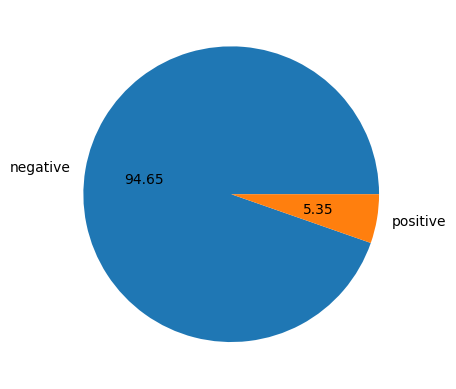

In [34]:
#plotting Corona column in a pie chart
plt.pie(df['Corona'].value_counts(),labels = ['negative','positive'],autopct = "%0.2f",)
plt.show();

# **Insights:**
* from the above figure it is clearly visible that 94.6% of the patients are corona negative and only 5.3% of the patients are corona positive.

# **Encoding:**
Converting values in Corona columns i.e. negative to 0 and positive to 1 with the help of mapper method.

In [35]:
mapper={'negative':0,'positive':1}

In [36]:
#using replace function to change the value
df['Corona'].replace(mapper,inplace=True)


In [37]:
df

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,True,False,True,False,False,0,Unknown,Unknown,Abroad
1,2020-03-11,False,True,False,False,False,1,Unknown,Unknown,Abroad
2,2020-03-11,False,True,False,False,False,1,Unknown,Unknown,Abroad
3,2020-03-11,True,False,False,False,False,0,Unknown,Unknown,Abroad
4,2020-03-11,True,False,False,False,False,0,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,False,False,False,False,False,1,Unknown,male,Unknown
278844,2020-04-30,False,False,False,False,False,0,Unknown,female,Unknown
278845,2020-04-30,False,False,False,False,False,0,Unknown,male,Unknown
278846,2020-04-30,False,False,False,False,False,0,Unknown,male,Unknown


In [38]:
#creating a copy of original dataset with name as df1
df1=df.copy()

In [39]:
#dropping Test_date columns as it is not much required for EDA but it will be needed during Machine learning model building
df1.drop(columns='Test_date',inplace=True)

In [40]:
#checking df1 which has no Test_date column
df1

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,True,False,True,False,False,0,Unknown,Unknown,Abroad
1,False,True,False,False,False,1,Unknown,Unknown,Abroad
2,False,True,False,False,False,1,Unknown,Unknown,Abroad
3,True,False,False,False,False,0,Unknown,Unknown,Abroad
4,True,False,False,False,False,0,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
278843,False,False,False,False,False,1,Unknown,male,Unknown
278844,False,False,False,False,False,0,Unknown,female,Unknown
278845,False,False,False,False,False,0,Unknown,male,Unknown
278846,False,False,False,False,False,0,Unknown,male,Unknown


In [41]:
#checking df which has Test_date column
df

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,True,False,True,False,False,0,Unknown,Unknown,Abroad
1,2020-03-11,False,True,False,False,False,1,Unknown,Unknown,Abroad
2,2020-03-11,False,True,False,False,False,1,Unknown,Unknown,Abroad
3,2020-03-11,True,False,False,False,False,0,Unknown,Unknown,Abroad
4,2020-03-11,True,False,False,False,False,0,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,False,False,False,False,False,1,Unknown,male,Unknown
278844,2020-04-30,False,False,False,False,False,0,Unknown,female,Unknown
278845,2020-04-30,False,False,False,False,False,0,Unknown,male,Unknown
278846,2020-04-30,False,False,False,False,False,0,Unknown,male,Unknown


In [42]:
# creating new dataframe with Corona value

df_positive = df[df['Corona'] == 1]
df_negative = df[df['Corona'] == 0]

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Cough_symptoms       274702 non-null  object
 1   Fever                274702 non-null  object
 2   Sore_throat          274702 non-null  object
 3   Shortness_of_breath  274702 non-null  object
 4   Headache             274702 non-null  object
 5   Corona               274702 non-null  int64 
 6   Age_60_above         274702 non-null  object
 7   Sex                  274702 non-null  object
 8   Known_contact        274702 non-null  object
dtypes: int64(1), object(8)
memory usage: 21.0+ MB


In [44]:
#getting all the independent variable in one dataframe
ind_var=df1.drop(columns='Corona')
ind_var

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
0,True,False,True,False,False,Unknown,Unknown,Abroad
1,False,True,False,False,False,Unknown,Unknown,Abroad
2,False,True,False,False,False,Unknown,Unknown,Abroad
3,True,False,False,False,False,Unknown,Unknown,Abroad
4,True,False,False,False,False,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...
278843,False,False,False,False,False,Unknown,male,Unknown
278844,False,False,False,False,False,Unknown,female,Unknown
278845,False,False,False,False,False,Unknown,male,Unknown
278846,False,False,False,False,False,Unknown,male,Unknown


# **Examining relationship between Dependent and Independent variable.**

In [45]:
for i in ind_var:
    # for patients with Corona positive
    print("--------------------------------------------------")
    print(f"{i} for patients with Corona positive")
    print(df_positive[i].value_counts().sort_values(ascending = False))
    # for patients with Corona negative
    print(f"\n{i} for patients with Corona negative")
    print(df_negative[i].value_counts().sort_values(ascending = False))

--------------------------------------------------
Cough_symptoms for patients with Corona positive
False    8112
True     6582
Name: Cough_symptoms, dtype: int64

Cough_symptoms for patients with Corona negative
False    225021
True      34987
Name: Cough_symptoms, dtype: int64
--------------------------------------------------
Fever for patients with Corona positive
False    9136
True     5558
Name: Fever, dtype: int64

Fever for patients with Corona negative
False    244192
True      15816
Name: Fever, dtype: int64
--------------------------------------------------
Sore_throat for patients with Corona positive
False    13171
True      1523
Name: Sore_throat, dtype: int64

Sore_throat for patients with Corona negative
False    259643
True        365
Name: Sore_throat, dtype: int64
--------------------------------------------------
Shortness_of_breath for patients with Corona positive
False    13532
True      1162
Name: Shortness_of_breath, dtype: int64

Shortness_of_breath for patien

# **Analyzing Corona positive patient symptoms:**

In [46]:
fig=px.histogram(df_positive,x='Fever',y='Corona',width=800, height=400,title='Corona(+) V/s Fever')
fig.show();

In [47]:
fig=px.histogram(df_positive,x='Cough_symptoms',y='Corona',width=800, height=400,title='Corona(+) V/s Cough_symptoms')
fig.show();

In [48]:
fig=px.histogram(df_positive,x='Headache',y='Corona',width=800, height=400,title='Corona(+) V/s Headache')
fig.show();

In [49]:
fig=px.histogram(df_positive,x='Sore_throat',y='Corona',width=800, height=400,title='Corona(+) V/s Sore_throat')
fig.show();

In [50]:
fig=px.histogram(df_positive,x='Shortness_of_breath',y='Corona',width=800, height=400,title='Corona(+) V/s Shortness_of_breath')
fig.show();

In [51]:
fig=px.histogram(df_positive,x='Age_60_above',y='Corona',width=800, height=400,title='Corona(+) V/s Age_60_above')
fig.show();

In [52]:
fig=px.histogram(df_positive,x='Sex',y='Corona',width=800, height=400,title='Corona(+) V/s Sex')
fig.show();

In [53]:
fig=px.histogram(df_positive,x='Known_contact',y='Corona',width=800, height=400,title='Corona(+) V/s Sex')
fig.show();

**Insights:**

*   Mostly Patients with corona positive have cough_symptoms and fever.
*   Headache, sore throat and shortness of breath are not present in Corona positive patients.

*   Majority of Corona Positive Patients have been in contact with other positive patients.
* Majority of males are corona positive.
* Majority of the Corona(+) patients are below age of 60

# **Feature Engineering:**
In this process we will tranform our data into features that are most suitable for machine learning model.

It includes:
  * Feature Tranformation
  * Feature Scaling
  * Train_test_split

In [54]:
#Checking information of cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Test_date            274702 non-null  datetime64[ns]
 1   Cough_symptoms       274702 non-null  object        
 2   Fever                274702 non-null  object        
 3   Sore_throat          274702 non-null  object        
 4   Shortness_of_breath  274702 non-null  object        
 5   Headache             274702 non-null  object        
 6   Corona               274702 non-null  int64         
 7   Age_60_above         274702 non-null  object        
 8   Sex                  274702 non-null  object        
 9   Known_contact        274702 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 23.1+ MB


In [55]:
#Checking all the unique values available in all columns except date
print(df['Cough_symptoms'].unique())
print(df['Fever'].unique())
print(df['Sore_throat'].unique())
print(df['Shortness_of_breath'].unique())
print(df['Headache'].unique())
print(df['Age_60_above'].unique())
print(df['Sex'].unique())
print(df['Known_contact'].unique())

[True False]
[False True]
[True False]
[False True]
[False True]
['Unknown' 'No' 'Yes']
['Unknown' 'male' 'female']
['Abroad' 'Contact with confirmed' 'Unknown']


In [56]:
#import LabelEncoder import sklearn
from sklearn.preprocessing import LabelEncoder


In [57]:
#tranforming all categorical variable into numerical variable with LabelEncoding
df[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above', 'Sex' , 'Known_contact']] =df[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above', 'Sex' , 'Known_contact']].apply(LabelEncoder().fit_transform)


In [58]:
df

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,1,0,1,0,0,0,1,0,0
1,2020-03-11,0,1,0,0,0,1,1,0,0
2,2020-03-11,0,1,0,0,0,1,1,0,0
3,2020-03-11,1,0,0,0,0,0,1,0,0
4,2020-03-11,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,0,0,0,0,0,1,1,2,2
278844,2020-04-30,0,0,0,0,0,0,1,1,2
278845,2020-04-30,0,0,0,0,0,0,1,2,2
278846,2020-04-30,0,0,0,0,0,0,1,2,2


In [59]:
#Checking all the unique values available after LabelEncoding
print(df['Cough_symptoms'].unique())
print(df['Fever'].unique())
print(df['Sore_throat'].unique())
print(df['Shortness_of_breath'].unique())
print(df['Headache'].unique())
print(df['Age_60_above'].unique())
print(df['Sex'].unique())
print(df['Known_contact'].unique())

[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0 2]
[0 2 1]
[0 1 2]


In [60]:
# 'Cough_symptoms' (TRUE = 1 , FALSE = 0)
# 'FEVER' (TRUE = 1 , FALSE = 0)
# 'Sore_throat' (TRUE = 1 , FALSE = 0)
# 'Shortness_of_breath' (TRUE = 1 , FALSE = 0)
# 'Headache' (TRUE = 1 , FALSE = 0)
# Corona (Positive =1 , Negative = 0)
# Age_60_above (No=0 , Unknown = 1 , Yes = 2)
# Sex (Unknown=0, Female=1, Male=2)
# Known_contact (Abroad=0, Contact with confirmed = 1, other = 2)

# **Train Test Split based on date**
We are required to split the dataset as training and testing data with the help of date.

We have to consider 11th March till 15th April as a training and validation set. From 16th April till 30th April as a test set.

In [61]:
# Breaking the data according to the date

break_date = pd.Timestamp("2020-04-15")
df_train_set = df[df["Test_date"] <= break_date]
df_test_set = df[df["Test_date"] > break_date]

In [62]:
df_train_set

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,1,0,1,0,0,0,1,0,0
1,2020-03-11,0,1,0,0,0,1,1,0,0
2,2020-03-11,0,1,0,0,0,1,1,0,0
3,2020-03-11,1,0,0,0,0,0,1,0,0
4,2020-03-11,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
163184,2020-04-15,0,0,0,0,0,0,1,2,2
163185,2020-04-15,0,0,0,0,0,0,1,2,2
163186,2020-04-15,0,0,0,0,0,0,1,1,2
163187,2020-04-15,0,0,0,0,0,0,1,2,2


In [63]:
df_test_set

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
163189,2020-04-16,1,0,0,0,0,0,1,1,0
163190,2020-04-16,0,0,0,0,0,0,1,1,2
163191,2020-04-16,1,0,0,0,0,0,1,1,0
163192,2020-04-16,0,0,0,0,0,0,1,2,2
163193,2020-04-16,0,0,0,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,0,0,0,0,0,1,1,2,2
278844,2020-04-30,0,0,0,0,0,0,1,1,2
278845,2020-04-30,0,0,0,0,0,0,1,2,2
278846,2020-04-30,0,0,0,0,0,0,1,2,2


In [64]:
#Spliting data into dependent and independent variable
X_train=df_train_set.drop(columns=['Test_date','Corona'],axis=1)

In [65]:
#Keeping data from 11th March to 15th April in training set as X_train and y_train
X_train

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
0,1,0,1,0,0,1,0,0
1,0,1,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0
3,1,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
163184,0,0,0,0,0,1,2,2
163185,0,0,0,0,0,1,2,2
163186,0,0,0,0,0,1,1,2
163187,0,0,0,0,0,1,2,2


In [66]:
y_train=df_train_set['Corona']
y_train

0         0
1         1
2         1
3         0
4         0
         ..
163184    0
163185    0
163186    0
163187    0
163188    0
Name: Corona, Length: 160463, dtype: int64

In [67]:
#keeping data from 16th April to 30th April in X_test and y_test
X_test=df_test_set.drop(columns=['Test_date','Corona'],axis=1)
X_test

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
163189,1,0,0,0,0,1,1,0
163190,0,0,0,0,0,1,1,2
163191,1,0,0,0,0,1,1,0
163192,0,0,0,0,0,1,2,2
163193,0,0,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,1,2,2
278844,0,0,0,0,0,1,1,2
278845,0,0,0,0,0,1,2,2
278846,0,0,0,0,0,1,2,2


In [68]:
y_test=df_test_set['Corona']
y_test

163189    0
163190    0
163191    0
163192    0
163193    0
         ..
278843    1
278844    0
278845    0
278846    0
278847    0
Name: Corona, Length: 114239, dtype: int64

In [69]:
# We have to divide X_train , y_train into Training Set and Validation in the ratio 4:1 which means 20%
#test_size=0.20 will divide the data further into 80% as training set and 20% as test set
# random_state=10 will fix the data set and will prevent random selection of data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state= 10)

In [70]:
#Training set

print('X_train Shape is:',X_train.shape)
print('y_train Shape is:',y_train.shape)
print('----------------------------------------')

#Testing set

print('X_test Shape is:',X_test.shape)
print('y_test Shape is:',y_test.shape)
print('----------------------------------------')

#Validation Set
print('X_validation Shape is:', X_val.shape)
print('y_validation Shape is:', y_val.shape)

X_train Shape is: (128370, 8)
y_train Shape is: (128370,)
----------------------------------------
X_test Shape is: (114239, 8)
y_test Shape is: (114239,)
----------------------------------------
X_validation Shape is: (32093, 8)
y_validation Shape is: (32093,)


# **Feature Scaling**

Is the process of tranforming the data so that they have a similar scale.

**Benifits of Feature Scaling**:
   1. Improves model performance
   2. Increase model robustness
   3. Improves model interpretability

In [71]:
#Importing StandardScaler for scaling the data
from sklearn.preprocessing import StandardScaler

#Assigning Object
Std_scale=StandardScaler()

In [72]:
X_train=pd.DataFrame(Std_scale.fit_transform(X_train),columns=X_train.columns)
X_train

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
0,-0.466770,-0.320753,-0.109319,-0.098439,-0.122864,0.820696,-2.024528,0.416914
1,2.142384,-0.320753,-0.109319,-0.098439,-0.122864,-0.521617,0.989548,-2.711223
2,-0.466770,-0.320753,-0.109319,-0.098439,-0.122864,2.163009,-0.517490,0.416914
3,-0.466770,-0.320753,-0.109319,-0.098439,-0.122864,-0.521617,-0.517490,0.416914
4,-0.466770,-0.320753,-0.109319,-0.098439,-0.122864,2.163009,-0.517490,0.416914
...,...,...,...,...,...,...,...,...
128365,-0.466770,-0.320753,-0.109319,-0.098439,-0.122864,-0.521617,-2.024528,0.416914
128366,-0.466770,-0.320753,-0.109319,-0.098439,-0.122864,-0.521617,-0.517490,0.416914
128367,-0.466770,-0.320753,-0.109319,-0.098439,-0.122864,-0.521617,-0.517490,0.416914
128368,-0.466770,-0.320753,-0.109319,-0.098439,-0.122864,2.163009,0.989548,0.416914


In [73]:
X_test=pd.DataFrame(Std_scale.transform(X_test),columns=X_test.columns)
X_test

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
0,2.142384,-0.320753,-0.109319,-0.098439,-0.122864,0.820696,-0.517490,-2.711223
1,-0.466770,-0.320753,-0.109319,-0.098439,-0.122864,0.820696,-0.517490,0.416914
2,2.142384,-0.320753,-0.109319,-0.098439,-0.122864,0.820696,-0.517490,-2.711223
3,-0.466770,-0.320753,-0.109319,-0.098439,-0.122864,0.820696,0.989548,0.416914
4,-0.466770,-0.320753,-0.109319,-0.098439,-0.122864,0.820696,0.989548,0.416914
...,...,...,...,...,...,...,...,...
114234,-0.466770,-0.320753,-0.109319,-0.098439,-0.122864,0.820696,0.989548,0.416914
114235,-0.466770,-0.320753,-0.109319,-0.098439,-0.122864,0.820696,-0.517490,0.416914
114236,-0.466770,-0.320753,-0.109319,-0.098439,-0.122864,0.820696,0.989548,0.416914
114237,-0.466770,-0.320753,-0.109319,-0.098439,-0.122864,0.820696,0.989548,0.416914


# **Machine Learning Models**

# **MODEL 1:- LOGISTIC REGRESSION**

It is supervised Machine Learning algorithm mainly used from classification task and our main objective is to predict someone is Corona(+) or Corona(-).

In [74]:
#importing LogisticRegression from sklearn library
from sklearn.linear_model import LogisticRegression
#Assigning Object to the model
log_reg=LogisticRegression()

In [75]:
#fitting our X_train and y_train into logistic model that we created above
log_reg.fit(X_train,y_train)

LogisticRegression()

In [76]:
#Checking pridiction of the model
model_pred=log_reg.predict(X_test)
model_pred

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
#to remove warnings import warning module
import warnings
warnings.filterwarnings("ignore")

In [78]:
#Checking Accuracy of our model with the help of accuracy_score
from sklearn.metrics import accuracy_score
print('Accuracy Score:-')
print("Train accuracy of Logistic Regression is", round(log_reg.score(X_train, y_train)*100,2))
print("Test accuracy of Logistic Regression is", round(accuracy_score(y_test, model_pred)*100,2))
print('-----------------------------------------------------------------------------------------------')
#Checking accuracy with the help of classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report:-')
print(classification_report(y_test,model_pred))

Accuracy Score:-
Train accuracy of Logistic Regression is 94.35
Test accuracy of Logistic Regression is 97.62
-----------------------------------------------------------------------------------------------
Classification Report:-
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    111541
           1       0.25      0.00      0.01      2698

    accuracy                           0.98    114239
   macro avg       0.61      0.50      0.50    114239
weighted avg       0.96      0.98      0.96    114239



# **Insights:**
The accuracy of **LogisticRegression** model is 97.64%

# **MODEL 2:- KNN(K-NEAREST NEIGHBOUR)**


*   KNN is a Supervised Learning, a non-parametric algorithm, and a lazy learner algorithm that categorizes the new data into the available categories based on similarity.
*   It is non-parametric, which means it does not make any assumption on underlying data.

*   It is a lazy learner algorithm since it saves the dataset instead of learning immediately from the training set and then uses it to execute an action when classifying data.

In [79]:
#importing KNN model
from sklearn.neighbors import KNeighborsClassifier

In [80]:
#assigning object to the model
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
#fitting data to our model
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [81]:
#making prediction on the model
knn_pred=knn.predict(X_test)

In [82]:
#Checking Accuracy of our model with the help of accuracy_score
from sklearn.metrics import accuracy_score
print('Accuracy Report:-')
print("Train accuracy of KNN is", round(knn.score(X_train, y_train)*100,2))
print("Test accuracy of KNN is", round(accuracy_score(y_test, knn_pred)*100,2))
print('-----------------------------------------------------------------------------------------------')
#Checking accuracy with the help of classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report:-')
print(classification_report(y_test,knn_pred))

Accuracy Report:-
Train accuracy of KNN is 95.81
Test accuracy of KNN is 98.48
-----------------------------------------------------------------------------------------------
Classification Report:-
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    111541
           1       0.78      0.50      0.61      2698

    accuracy                           0.98    114239
   macro avg       0.88      0.75      0.80    114239
weighted avg       0.98      0.98      0.98    114239



# **Insights:**

The accuracy of KNN model is 98.4%


# **MODEL 3:- DECISION TREE**

*   One of the widely used supervised type machine learning methods for classification and regression is the decision tree algorithm. It also known as classification and regression tree (CART).
*   According to predetermined principles, data is constantly divided in this algorithm at each row till the final result is obtained. Decision trees classify the results into groups until no more similarity is left. Decision tree is non-parametric approach and does not depend on any probability distribution assumptions.

In [83]:
#importing decision tree model
from sklearn.tree import DecisionTreeClassifier


In [84]:
#assigning object to the model
d_tree=DecisionTreeClassifier(criterion='entropy',max_depth=3)
#fitting data to our model
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [85]:
#making prediction on our model
dt_pred=d_tree.predict(X_test)

In [86]:
#Checking Accuracy of our model with the help of accuracy_score
from sklearn.metrics import accuracy_score
print('Accuracy Report:-')
print("Train accuracy of Decision Tree is", round(d_tree.score(X_train, y_train)*100,2))
print("Test accuracy of Decision Tree is", round(accuracy_score(y_test, dt_pred)*100,2))
print('-----------------------------------------------------------------------------------------------')
#Checking accuracy with the help of classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report:-')
print(classification_report(y_test,dt_pred))

Accuracy Report:-
Train accuracy of Decision Tree is 95.07
Test accuracy of Decision Tree is 98.54
-----------------------------------------------------------------------------------------------
Classification Report:-
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    111541
           1       0.76      0.56      0.64      2698

    accuracy                           0.99    114239
   macro avg       0.87      0.78      0.82    114239
weighted avg       0.98      0.99      0.98    114239



# **Insights:**

The accuracy of DecisionTreeClassifier is 98.5%

# **MODEL 4:- RANDOM FOREST**

*   Random Forest mixes the output of various decision trees to produce a single conclusion. Its widespread use is motivated by its adaptability and usability because it can solve classification and regression issues.
*   The concept of Breiman's "bagging" is combined with a random selection of elements to create random forest. By using the average or mode of the results from several decision trees, the forecast is meant to be more precise. The more decision trees that are taken into account, the more precise the results will be. Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap.

In [87]:
#importing RandomForest model
from sklearn.ensemble import RandomForestClassifier

In [88]:
#assigning object to our model
rf=RandomForestClassifier(n_estimators=10,criterion='entropy')
#fitting data to our model
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [89]:
#predicting our model
rf_pred=rf.predict(X_test)

In [90]:
#Checking Accuracy of our model with the help of accuracy_score
from sklearn.metrics import accuracy_score
print('Accuracy Report:-')
print("Train accuracy of Random Forest is", round(rf.score(X_train, y_train)*100,2))
print("Test accuracy of Random Forest is", round(accuracy_score(y_test, rf_pred)*100,2))
print('-----------------------------------------------------------------------------------------------')
#Checking accuracy with the help of classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report:-')
print(classification_report(y_test,rf_pred))

Accuracy Report:-
Train accuracy of Random Forest is 95.91
Test accuracy of Random Forest is 98.51
-----------------------------------------------------------------------------------------------
Classification Report:-
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    111541
           1       0.75      0.56      0.64      2698

    accuracy                           0.99    114239
   macro avg       0.87      0.78      0.82    114239
weighted avg       0.98      0.99      0.98    114239



# **Insights:**
1. The accuracy score of LogistiRegression model is 97.6%
2. The accuracy score of KNN, Decision Tree and Random Forest is almost similar to 98.5%
3. So we can use any of the 3 model mentioned above for better prediction

# **Visual Representation Of Model Accuracy**

# **Step-1: Creating model accuracy object**

In [154]:
log_acc=round(accuracy_score(y_test, model_pred)*100,2)
log_acc

97.62

In [155]:
knn_acc=round(accuracy_score(y_test, knn_pred)*100,2)
knn_acc

98.48

In [157]:
dt_acc=round(accuracy_score(y_test, dt_pred)*100,2)
dt_acc

98.54

In [158]:
rf_acc=round(accuracy_score(y_test, rf_pred)*100,2)
rf_acc

98.51

# **Step-2: Creating Dataframe**

In [169]:
mod_acc=pd.DataFrame({'MODELS':['MODEL 1','MODEL 2','MODEL 3','MODEL 4'],'ACCURACY':[log_acc,knn_acc,dt_acc,rf_acc]})
mod_acc

,MODELS,ACCURACY
0,MODEL 1,97.62
1,MODEL 2,98.48
2,MODEL 3,98.54
3,MODEL 4,98.51


# **Creating Bar Graph**

In [174]:
fig=px.histogram(mod_acc,x='MODELS',y='ACCURACY',title='ACCURACY OF MODLELS')
fig.show()

# **SQL PART:-**

In [91]:
#using the cleaned file that we saved earlier
sql_df=pd.read_csv('cleaned_file.csv')

In [92]:
sql_df

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,True,False,True,False,False,negative,Unknown,Unknown,Abroad
1,2020-03-11,False,True,False,False,False,positive,Unknown,Unknown,Abroad
2,2020-03-11,False,True,False,False,False,positive,Unknown,Unknown,Abroad
3,2020-03-11,True,False,False,False,False,negative,Unknown,Unknown,Abroad
4,2020-03-11,True,False,False,False,False,negative,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
274697,2020-04-30,False,False,False,False,False,positive,Unknown,male,Unknown
274698,2020-04-30,False,False,False,False,False,negative,Unknown,female,Unknown
274699,2020-04-30,False,False,False,False,False,negative,Unknown,male,Unknown
274700,2020-04-30,False,False,False,False,False,negative,Unknown,male,Unknown


In [93]:
#importing duckdb library for sql analysis
import duckdb

In [94]:
#Assigning variable to duckdb
sql=duckdb.connect()
#Registering our variable
sql.register('sql_df',sql_df)

In [95]:
#checking our sql qurries are working properly or not
sql.execute("select * from sql_df limit 10").fetchdf()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,True,False,True,False,False,negative,Unknown,Unknown,Abroad
1,2020-03-11,False,True,False,False,False,positive,Unknown,Unknown,Abroad
2,2020-03-11,False,True,False,False,False,positive,Unknown,Unknown,Abroad
3,2020-03-11,True,False,False,False,False,negative,Unknown,Unknown,Abroad
4,2020-03-11,True,False,False,False,False,negative,Unknown,Unknown,Contact with confirmed
5,2020-03-11,False,False,False,False,False,negative,Unknown,Unknown,Unknown
6,2020-03-11,False,True,False,False,False,negative,Unknown,Unknown,Abroad
7,2020-03-11,True,False,False,False,False,negative,Unknown,Unknown,Abroad
8,2020-03-11,True,False,True,False,False,negative,Unknown,Unknown,Abroad
9,2020-03-11,True,False,True,False,False,negative,Unknown,Unknown,Abroad


# **SQL Querries:-**

1. Find the number of corona patients who faced shortness of breath.

2. Find the number of negative corona patients who have fever and sore_throat.

3. Group the data by month and rank the number of positive cases.

4. Find the female negative corona patients who faced cough and headache.

5. How many elderly corona patients have faced breathing problems?

6. Which three symptoms were more common among COVID positive patients?

7. Which symptom was less common among COVID negative people?

8. What are the most common symptoms among COVID positive males whose known contact was abroad

In [96]:
#Querry 1:Find the number of corona patients who faced shortness of breath.
sql.execute('''select count(*) as 'Number of Corona Patient with Shortness of breath' from sql_df
where Corona='positive' and Shortness_of_breath='True' ''').fetch_df()

,Number of Corona Patient with Shortness of breath
0,1162


In [102]:
#Querry 2:Find the number of negative corona patients who have fever and sore_throat.
sql.execute('''select count(*) as 'Negative Corona patients with Fever and Sore Throat' from sql_df
where Corona='negative' and Fever='True' and Sore_throat='True' ''').fetch_df()

,Negative Corona patients with Fever and Sore Throat
0,121


In [114]:
#Querry 3:-Group the data by month and rank the number of positive cases.
sql.execute('''select Test_date,count(Corona) as 'Corona(+) Patients' from sql_df
where Corona='positive'
group by Test_date
order by count(Corona) desc ''').fetch_df()

,Test_date,Corona(+) Patients
0,2020-03-31,729
1,2020-04-01,681
2,2020-04-02,615
3,2020-03-30,611
4,2020-03-26,541
5,2020-03-27,516
6,2020-04-05,505
7,2020-04-03,504
8,2020-03-25,486
9,2020-04-07,483


In [118]:
#querry 4:Find the female negative corona patients who faced cough and headache.
sql.execute('''select Sex,Headache,Cough_symptoms,Corona,count(*) as 'N_patient' from sql_df
where Corona='negative' and Cough_symptoms='True' and Headache='True' and Sex='female'
group by Sex,Headache,Cough_symptoms,Corona ''').fetch_df()

,Sex,Headache,Cough_symptoms,Corona,N_patient
0,female,True,True,negative,32


In [119]:
#Querry 5:How many elderly corona patients have faced breathing problems?

sql.execute('''select Age_60_above,Shortness_of_breath,Corona,count(*) as 'N_patient' from sql_df
where Corona='positive' and Shortness_of_breath='True' and Age_60_above='Yes'
group by Age_60_above,Shortness_of_breath,Corona ''').fetch_df()

,Age_60_above,Shortness_of_breath,Corona,N_patient
0,Yes,True,positive,262


In [137]:
#Querry-6: Which three symptoms were more common among COVID positive patients?
sql.execute('''with covid_positive as
(select Cough_symptoms,Fever,Sore_throat,Corona from sql_df where Cough_symptoms='True' and Fever='True' and Sore_throat='True' and Corona='positive')
select Corona, Cough_symptoms,Fever,Sore_throat,count(*) as 'n_patients' from covid_positive
group by Corona,Cough_symptoms,Fever,Sore_throat''').fetch_df()

,Corona,Cough_symptoms,Fever,Sore_throat,n_patients
0,positive,True,True,True,552


In [148]:
#Querry-7: Which symptom was less common among COVID negative people?
sql.execute('''with covid_negative as
(select Cough_symptoms,Fever,Sore_throat,Headache,Shortness_of_breath,Corona from sql_df
where Cough_symptoms='False' and Fever='False' and Sore_throat='False' and Headache='False' and Shortness_of_breath='False' and Corona='negative')
select Corona, Cough_symptoms,Fever,Sore_throat,Headache,Shortness_of_breath,count(*) as 'n_patients' from covid_negative
group by Corona,Cough_symptoms,Fever,Sore_throat,Headache,Shortness_of_breath ''').fetch_df()

,Corona,Cough_symptoms,Fever,Sore_throat,Headache,Shortness_of_breath,n_patients
0,negative,False,False,False,False,False,220645


In [150]:
#Querry-8: What are the most common symptoms among COVID positive males whose known contact was abroad?
sql.execute(''' select Cough_symptoms,Fever,Sore_throat,Headache,Shortness_of_breath,Corona,Sex,Known_contact,count(*) as 'N_patient' from sql_df
where Sex='male' and Corona='positive' and Known_contact='Abroad'
group by Cough_symptoms,Fever,Sore_throat,Headache,Shortness_of_breath,Corona,Sex,Known_contact
order by count(*) desc '''  ).fetch_df()

,Cough_symptoms,Fever,Sore_throat,Headache,Shortness_of_breath,Corona,Sex,Known_contact,N_patient
0,True,False,False,False,False,positive,male,Abroad,189
1,True,True,False,False,False,positive,male,Abroad,186
2,False,False,False,False,False,positive,male,Abroad,170
3,False,True,False,False,False,positive,male,Abroad,85
4,True,True,False,True,False,positive,male,Abroad,28
5,False,False,False,True,False,positive,male,Abroad,23
6,True,True,False,False,True,positive,male,Abroad,22
7,True,True,True,False,False,positive,male,Abroad,21
8,True,False,False,True,False,positive,male,Abroad,21
9,False,True,False,True,False,positive,male,Abroad,19


# **Insights:**
* Cough symptoms and fever are the most common symptoms in male covid(+) patients whose known contact is abroad.
